In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn

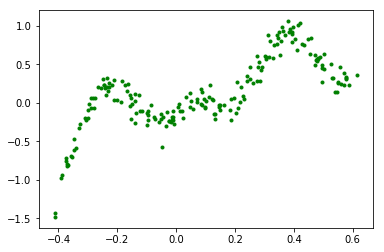

In [5]:
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [6]:
def forward(X, endx, endy):
    y = (endy[1] - endy[0])/(endx[1]-endx[0])*(X - endx[0]) + endy[0]
    return y

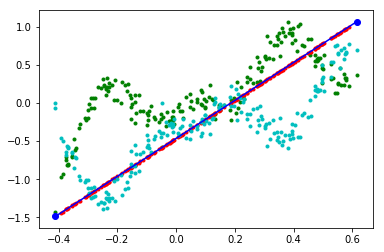

In [137]:
endx, endy = [x.min(), x.max()], [y.min(), y.max()]
endx, endy = np.array(endx), np.array(endy)
Y = forward(x, endx, endy)
dy = Y - y

plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')
plt.scatter(x, dy, marker='.', color='c')
plt.plot(endx, endy, marker='o', color='b')

In [138]:
def backward(X, dy, endx, endy):
    dy0 = dy * (-(X -endx[0])/(endx[1] - endx[0]) + 1)
    dy1 = dy * (X -endx[0])/(endx[1] - endx[0])
    dendy = np.array([dy0.mean(), dy1.mean()])
    return dendy

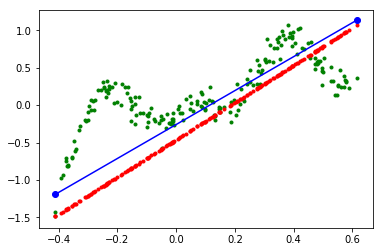

In [139]:
dendy = backward(x, dy, endx, endy)
endy = endy - dendy

plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')
plt.plot(endx, endy, marker='o', color='b')

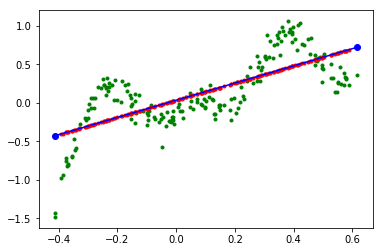

In [191]:
Y = forward(x, endx, endy)
dy = Y - y
dendy = backward(x, dy, endx, endy)
endy = endy - dendy

plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')
plt.plot(endx, endy, marker='o', color='b')
plt.show()

In [192]:
(endy[1] - endy[0])/(endx[1] - endx[0]), -(endy[1] - endy[0])*endx[0] + endy[0]

(1.1167960748404024, 0.04571450069659605)

array([1.11666679, 0.0338472 ])

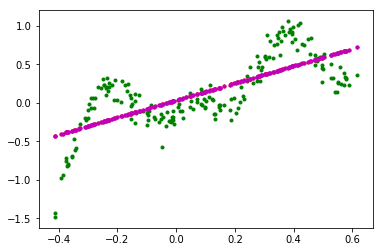

In [197]:
xx = np.c_[x, np.ones_like(x)]
W = np.linalg.pinv(xx)@y
Y_ = xx@W
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')
plt.scatter(x, Y_, marker='.', color='m')
W

In [204]:
dy_ = Y_ - y
(dy**2).mean(), (dy_**2).mean()

(0.09544391836488429, 0.09544391636367512)

In [205]:
def inrange(X, break0, break1): #if x is after
    xmsk1 = X >= break0
    xmsk2 = X < break1
    xmsk = np.bitwise_and(xmsk1, xmsk2)
    xs = xmsk #*X
    return xs

In [206]:
def forward2(X, endx, endy):
    y = np.zeros_like(X)
    for i in range(len(endx)-1):
        ir = inrange(X, endx[i], endx[i+1])
        y_ = (endy[i+1] - endy[i])/(endx[i+1]-endx[i])*(X - endx[i]) + endy[i]
        y = y + y_*ir
    return y

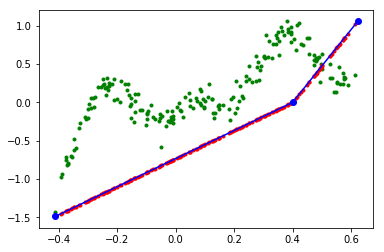

In [279]:
endx, endy = [x.min(), 0.4, x.max()+1e-2], [y.min(), 0, y.max()]
endx, endy = np.array(endx), np.array(endy)

Y = forward2(x, endx, endy)
dy = Y - y

plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')
plt.plot(endx, endy, marker='o', color='b')
plt.show()

In [280]:
def backward2(X, dy, endx, endy):
    dendy = []
    dyf = dy * (-(X -endx[0])/(endx[1] - endx[0]) + 1) * inrange(X, endx[0], endx[1])
    dendy.append(dyf)
    for i in range(1, len(endx)-1):
        dy_0 = dy * (-(X -endx[i])/(endx[i+1] - endx[i]) + 1) * inrange(X, endx[i], endx[i+1])
        dy_1 = dy * (X -endx[i-1])/(endx[i] - endx[i-1]) * inrange(X, endx[i-1], endx[i])
        dy_ = dy_0 + dy_1
        dendy.append(dy_)
        
    dyl = dy * (X -endx[-2])/(endx[-1] - endx[-2]) * inrange(X, endx[-2], endx[-1])
    dendy.append(dyl)
    
    dendy = np.array(dendy)
    dendy = dendy.mean(axis=1)
    return dendy

[ 0.00030386 -0.00049219  0.00298457]


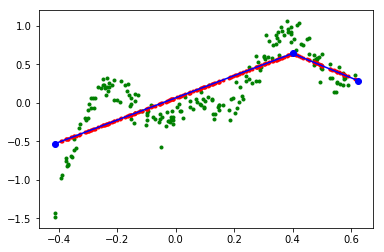

In [334]:
Y = forward2(x, endx, endy)
dy = Y - y
dendy = backward2(x, dy, endx, endy)
print(dendy)
endy = endy - dendy

plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, Y, marker='.', color='r')
plt.plot(endx, endy, marker='o', color='b')
plt.show()